In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

In [2]:
# The path to our CSV file
airline_delay_cause ="input_Data/Airline_Delay_Cause.csv"

In [3]:
# Read Airline_Delay_Cause.csv into pandas.
airline_delay_cause_df = pd.read_csv(airline_delay_cause)

In [4]:
airline_delay_cause_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
71658,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
71659,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0
71660,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0


In [5]:
#Extract"arr_flights","arr_del15","airport_name", "carrier_ct","weather_ct","nas_ct",
#"security_ct","late_aircraft_ct","carrier_name" and drop missing data.
percentage_delay_df = airline_delay_cause_df[["arr_flights","arr_del15","airport_name",
                                              "carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct","carrier_name"]].dropna()
percentage_delay_df

,arr_flights,arr_del15,airport_name,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_name
0,33.0,2.0,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.92,1.00,0.08,0.0,0.00,Endeavor Air Inc.
1,78.0,25.0,"Albany, GA: Southwest Georgia Regional",11.80,0.72,5.01,0.0,7.48,Endeavor Air Inc.
2,124.0,19.0,"Nantucket, MA: Nantucket Memorial",5.84,1.00,6.76,0.0,5.40,Endeavor Air Inc.
3,67.0,10.0,"Alexandria, LA: Alexandria International",1.32,1.00,2.40,1.0,4.28,Endeavor Air Inc.
4,174.0,30.0,"Augusta, GA: Augusta Regional at Bush Field",18.10,5.75,3.60,0.0,2.55,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...
71657,195.0,68.0,"Richmond, VA: Richmond International",12.12,1.87,17.97,0.0,36.04,Envoy Air
71658,52.0,14.0,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",2.74,0.69,2.46,0.0,8.11,Envoy Air
71659,106.0,26.0,"Rochester, NY: Greater Rochester International",4.67,2.26,11.81,0.0,7.26,Envoy Air
71660,116.0,35.0,"Rochester, MN: Rochester International",6.83,6.92,11.50,0.0,9.75,Envoy Air


In [6]:
#groupby airport_name so that we can find sum of arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,
#security_ct,late_aircraft_ct by each airport

clean_delay_airport_df = percentage_delay_df.groupby(["airport_name"]).sum()

# describe()-to find the approximate number of flights to be considered.
#clean_delay_airport_df.reset_index().describe()
clean_delay_airport_df =clean_delay_airport_df.reset_index()
clean_delay_airport_df

,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,"Aberdeen, SD: Aberdeen Regional",2632.0,276.0,164.17,52.79,32.68,0.00,26.36
1,"Abilene, TX: Abilene Regional",7524.0,1074.0,358.56,79.58,297.63,1.65,336.54
2,"Adak Island, AK: Adak",374.0,90.0,16.81,5.57,33.23,2.88,31.49
3,"Aguadilla, PR: Rafael Hernandez",5798.0,1856.0,768.71,64.34,456.15,13.60,553.17
4,"Akron, OH: Akron-Canton Regional",12553.0,2835.0,930.33,136.78,597.49,10.21,1160.25
...,...,...,...,...,...,...,...,...
374,"Worcester, MA: Worcester Regional",3148.0,655.0,340.60,17.70,89.72,2.73,204.28
375,"Wrangell, AK: Wrangell Airport",2596.0,450.0,84.56,16.40,132.78,6.26,209.97
376,"Yakima, WA: Yakima Air Terminal/McAllister Field",1178.0,147.0,63.24,4.07,15.17,0.00,64.52
377,"Yakutat, AK: Yakutat Airport",2592.0,395.0,55.30,15.33,116.70,3.82,203.85


In [7]:
## Create a new column(arr_del_pct15) that finds the average arrival delay percentage
clean_delay_airport_df['arr_del_pct15'] = (clean_delay_airport_df['arr_del15']/clean_delay_airport_df['arr_flights'])*100
clean_delay_airport_df.describe()
# remove the rows with minimal arrival flight counts to avoid any skewed results.
#Sorted data in descending order so that we can pick first 3 airport with worst dealys.
sorted_airport_delay_df=clean_delay_airport_df[(clean_delay_airport_df['arr_flights'] >=3000)].sort_values(by=['arr_del_pct15'], ascending=False)
sorted_airport_delay_df

,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_del_pct15
3,"Aguadilla, PR: Rafael Hernandez",5798.0,1856.0,768.71,64.34,456.15,13.60,553.17,32.011038
284,"Punta Gorda, FL: Punta Gorda Airport",21172.0,6229.0,1349.81,341.54,2003.74,16.29,2517.65,29.420933
269,"Phoenix, AZ: Phoenix - Mesa Gateway",20713.0,5545.0,1347.47,255.68,1283.04,40.23,2618.52,26.770627
311,"Sanford, FL: Orlando Sanford International",35242.0,8929.0,2217.86,531.90,2088.70,40.06,4050.47,25.336247
18,"Aspen, CO: Aspen Pitkin County Sardy Field",21508.0,5324.0,2547.52,404.84,941.43,6.00,1424.23,24.753580
...,...,...,...,...,...,...,...,...,...
350,"Twin Falls, ID: Joslin Field - Magic Valley Re...",3238.0,327.0,216.58,58.76,20.19,0.00,31.48,10.098826
148,"Helena, MT: Helena Regional",4827.0,450.0,259.71,53.42,45.87,1.00,90.03,9.322561
150,"Hilo, HI: Hilo International",18931.0,1562.0,864.77,34.35,95.19,11.08,556.63,8.251017
195,"Lewiston, ID: Lewiston Nez Perce County",3356.0,273.0,191.74,45.76,18.16,0.96,16.40,8.134684


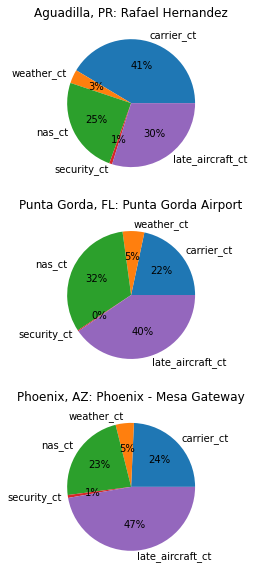

In [8]:
# plt
airport_count=3
worst_airports = sorted_airport_delay_df.head(airport_count).iloc[:,[3,4,5,6,7]]
worst_airports

titles = sorted_airport_delay_df.head(airport_count)['airport_name']

fig, axs = plt.subplots(airport_count, 1,figsize=(10, 10))

for i,worst_airport in enumerate(np.array(worst_airports)):
    
    axs[i].pie(worst_airport, labels = worst_airports.columns,autopct='%1.0f%%')
    axs[i].set_title(titles.iloc[i])

In [9]:
clean_delay_carrier_df = percentage_delay_df.groupby(["carrier_name"]).sum()


# describe()-to find the approximate number of flights to be considered.
#clean_delay_airport_df.reset_index().describe()
clean_delay_carrier_df =clean_delay_carrier_df.reset_index()
clean_delay_carrier_df

,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,Alaska Airlines Inc.,721506.0,119918.0,32191.60,2472.65,50358.63,1007.81,33887.62
1,Allegiant Air,392172.0,92922.0,24222.86,5105.97,23975.86,519.45,39099.16
2,American Airlines Inc.,2748877.0,487327.0,167485.75,18152.87,139460.63,1832.47,160395.02
3,Delta Air Lines Inc.,2833179.0,365777.0,137885.16,12964.86,121252.47,730.67,92942.63
4,Endeavor Air Inc.,877542.0,105107.0,30730.56,4438.85,34448.96,92.39,35396.52
5,Envoy Air,944652.0,155797.0,35266.06,10146.36,56623.48,323.64,53437.90
6,ExpressJet Airlines Inc.,37578.0,8682.0,2033.36,164.16,3694.67,0.00,2789.75
7,ExpressJet Airlines LLC,149209.0,29672.0,6918.17,716.14,13129.98,0.00,8907.94
8,Frontier Airlines Inc.,450391.0,100818.0,30971.19,1771.99,34174.37,0.00,33900.12
9,Hawaiian Airlines Inc.,227058.0,25168.0,16566.04,657.54,356.23,217.62,7370.75


In [10]:
clean_delay_carrier_df['arr_del_pct15'] = (clean_delay_carrier_df['arr_del15']/clean_delay_carrier_df['arr_flights'])*100
clean_delay_carrier_df.describe()
sorted_carrier_delay_df=clean_delay_carrier_df.sort_values(by=['arr_del_pct15'], ascending=False)
#sorted_carrier_delay_df.shape[0]
sorted_carrier_delay_df

,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_del_pct15
11,JetBlue Airways,801046.0,193568.0,76849.50,3729.13,51949.10,841.73,60198.43,24.164405
1,Allegiant Air,392172.0,92922.0,24222.86,5105.97,23975.86,519.45,39099.16,23.694195
6,ExpressJet Airlines Inc.,37578.0,8682.0,2033.36,164.16,3694.67,0.00,2789.75,23.103944
8,Frontier Airlines Inc.,450391.0,100818.0,30971.19,1771.99,34174.37,0.00,33900.12,22.384550
7,ExpressJet Airlines LLC,149209.0,29672.0,6918.17,716.14,13129.98,0.00,8907.94,19.886200
17,Spirit Air Lines,660236.0,124687.0,32615.45,4382.92,56423.11,1485.83,29780.05,18.885217
12,Mesa Airlines Inc.,595870.0,107761.0,36229.45,7062.86,26993.38,211.65,37263.76,18.084649
2,American Airlines Inc.,2748877.0,487327.0,167485.75,18152.87,139460.63,1832.47,160395.02,17.728221
18,United Air Lines Inc.,1732934.0,306790.0,86360.61,11405.17,110825.13,78.78,98121.05,17.703502
16,Southwest Airlines Co.,4121787.0,698207.0,259128.36,10373.48,127903.02,2474.74,298327.67,16.939425


11             JetBlue Airways
1                Allegiant Air
6     ExpressJet Airlines Inc.
Name: carrier_name, dtype: object


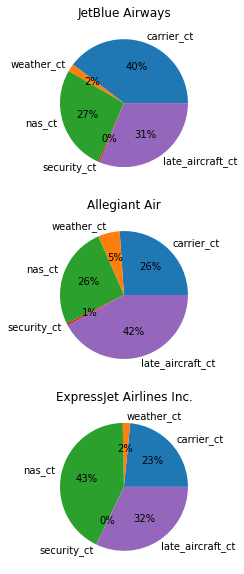

In [11]:
carrier_count=3
worst_carriers = sorted_carrier_delay_df.head(carrier_count).iloc[:,[3,4,5,6,7]]
worst_carriers

titles = sorted_carrier_delay_df.head(carrier_count)['carrier_name']
print(titles)

fig, axs = plt.subplots(carrier_count, 1,figsize=(10, 10))

for i,worst_carrier in enumerate(np.array(worst_carriers)):
    axs[i].pie(worst_carrier, labels = worst_carriers.columns,autopct='%1.0f%%')
    axs[i].set_title(titles.iloc[i])

In [12]:
delay_month_df = airline_delay_cause_df[["year","month","arr_flights","arr_del15"]].dropna()
delay_month_df


,year,month,arr_flights,arr_del15
0,2022,7,33.0,2.0
1,2022,7,78.0,25.0
2,2022,7,124.0,19.0
3,2022,7,67.0,10.0
4,2022,7,174.0,30.0
...,...,...,...,...
71657,2019,1,195.0,68.0
71658,2019,1,52.0,14.0
71659,2019,1,106.0,26.0
71660,2019,1,116.0,35.0


In [13]:
clean_delay_month_df = delay_month_df.groupby(["year","month"]).sum()
clean_delay_month_df
clean_delay_month_df =clean_delay_month_df.reset_index()
clean_delay_month_df

,year,month,arr_flights,arr_del15
0,2019,1,583980.0,105222.0
1,2019,2,533174.0,119477.0
2,2019,3,632072.0,106277.0
3,2019,4,612023.0,108518.0
4,2019,5,636390.0,126283.0
5,2019,6,636691.0,153358.0
6,2019,7,659029.0,135630.0
7,2019,8,658461.0,133278.0
8,2019,9,605979.0,83568.0
9,2019,10,636014.0,105046.0


In [14]:
clean_delay_month_df['arr_del_pct15'] = (clean_delay_month_df['arr_del15']/clean_delay_month_df['arr_flights'])*100
clean_delay_month_df
#sorted_clean_delay_month_df=clean_delay_month_df.sort_values(by=['arr_del_pct15'], ascending=False)


,year,month,arr_flights,arr_del15,arr_del_pct15
0,2019,1,583980.0,105222.0,18.018083
1,2019,2,533174.0,119477.0,22.408632
2,2019,3,632072.0,106277.0,16.814065
3,2019,4,612023.0,108518.0,17.731033
4,2019,5,636390.0,126283.0,19.843649
5,2019,6,636691.0,153358.0,24.086723
6,2019,7,659029.0,135630.0,20.580278
7,2019,8,658461.0,133278.0,20.240834
8,2019,9,605979.0,83568.0,13.790577
9,2019,10,636014.0,105046.0,16.516303


Text(0, 0.5, 'Percentage Delay')

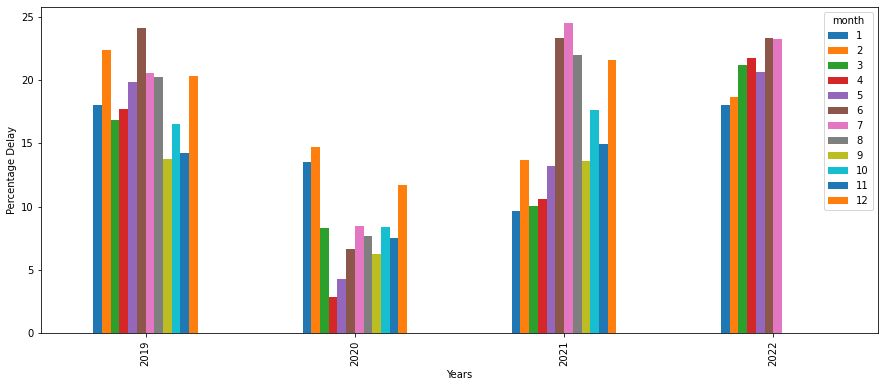

In [15]:
clean_delay_month_df_pivot = pd.pivot_table(clean_delay_month_df, values="arr_del_pct15",
                                           index="year",columns="month")
ax = clean_delay_month_df_pivot.plot(kind = "bar")
fig = ax.get_figure()
fig.set_size_inches(15, 6)
ax.set_xlabel("Years")
ax.set_ylabel("Percentage Delay")
 

In [16]:
percentage_delay_df


,arr_flights,arr_del15,airport_name,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_name
0,33.0,2.0,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.92,1.00,0.08,0.0,0.00,Endeavor Air Inc.
1,78.0,25.0,"Albany, GA: Southwest Georgia Regional",11.80,0.72,5.01,0.0,7.48,Endeavor Air Inc.
2,124.0,19.0,"Nantucket, MA: Nantucket Memorial",5.84,1.00,6.76,0.0,5.40,Endeavor Air Inc.
3,67.0,10.0,"Alexandria, LA: Alexandria International",1.32,1.00,2.40,1.0,4.28,Endeavor Air Inc.
4,174.0,30.0,"Augusta, GA: Augusta Regional at Bush Field",18.10,5.75,3.60,0.0,2.55,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...
71657,195.0,68.0,"Richmond, VA: Richmond International",12.12,1.87,17.97,0.0,36.04,Envoy Air
71658,52.0,14.0,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",2.74,0.69,2.46,0.0,8.11,Envoy Air
71659,106.0,26.0,"Rochester, NY: Greater Rochester International",4.67,2.26,11.81,0.0,7.26,Envoy Air
71660,116.0,35.0,"Rochester, MN: Rochester International",6.83,6.92,11.50,0.0,9.75,Envoy Air


In [17]:
# number of airport
airline_delay_cause_df["airport"].nunique()
airline_delay_cause_df.describe()


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,71662.000000,71662.000000,71531.000000,71346.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000,71531.000000
mean,2020.318356,6.080280,307.724162,51.217545,17.510190,1.951028,14.338386,0.160129,17.125396,8.885686,0.704981,3425.703317,1261.104752,205.868323,690.455970,7.518796,1260.748081
std,1.064799,3.399072,873.362400,149.668639,46.868724,6.864708,50.490818,0.786068,56.983923,58.501203,3.227012,11006.043119,3965.205148,821.963716,2893.137442,46.281739,4345.521166
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,37.000000,5.000000,1.650000,0.000000,0.530000,0.000000,0.780000,0.000000,0.000000,225.000000,73.000000,0.000000,17.000000,0.000000,24.000000
50%,2020.000000,6.000000,86.000000,13.000000,4.920000,0.150000,2.730000,0.000000,3.140000,1.000000,0.000000,755.000000,280.000000,8.000000,100.000000,0.000000,203.000000
75%,2021.000000,9.000000,207.000000,35.000000,13.500000,1.560000,8.340000,0.000000,10.540000,4.000000,0.000000,2209.000000,907.000000,123.000000,336.000000,0.000000,769.000000
max,2022.000000,12.000000,21873.000000,3714.000000,1147.000000,226.000000,1485.820000,58.690000,1531.810000,4951.000000,154.000000,329847.000000,119425.000000,27876.000000,97283.000000,3760.000000,143192.000000


In [18]:
# Top 10 busy airports filtered by numeber of flights arrived
busy_airports=airline_delay_cause_df.groupby(["airport"]).sum()['arr_flights'].sort_values(ascending =False).head(10)
busy_airports_list = busy_airports.index.values
busy_airports_list

array(['ATL', 'DFW', 'ORD', 'DEN', 'CLT', 'LAX', 'PHX', 'LAS', 'SEA',
       'IAH'], dtype=object)

In [19]:
# filtering data based on busy airports
# Most busy airport where the number of flight per month greater than 15,000 (-delta)
busy_airports_df = airline_delay_cause_df[(airline_delay_cause_df["airport"].isin(busy_airports_list)) &(airline_delay_cause_df["arr_flights"] > 15000) ]
busy_airports_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
362,2022,7,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18388.0,3479.0,1096.18,134.80,...,2.00,1423.26,171.0,50.0,259825.0,119425.0,9972.0,37919.0,85.0,92424.0
2049,2022,6,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",17780.0,2878.0,1076.00,108.55,...,0.98,1137.99,569.0,39.0,228942.0,111079.0,9859.0,29330.0,116.0,78558.0
3768,2022,5,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18297.0,2573.0,1012.39,95.51,...,0.52,963.54,444.0,23.0,193784.0,102534.0,7741.0,19640.0,34.0,63835.0
5472,2022,4,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",17372.0,2502.0,858.72,50.80,...,0.00,1083.18,201.0,23.0,193242.0,86813.0,7128.0,22886.0,0.0,76415.0
7183,2022,3,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",17795.0,2713.0,867.53,78.33,...,4.13,1016.61,106.0,42.0,205289.0,84785.0,10073.0,33355.0,165.0,76911.0
10560,2022,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",16416.0,1993.0,748.45,97.55,...,1.49,594.26,536.0,70.0,140986.0,69162.0,10598.0,24198.0,67.0,36961.0
12263,2021,12,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",16475.0,2205.0,834.10,71.88,...,2.82,854.01,291.0,12.0,163565.0,82981.0,8857.0,16367.0,91.0,55269.0
13964,2021,11,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",16992.0,1387.0,522.72,23.90,...,5.04,440.99,5.0,0.0,80813.0,41165.0,2180.0,13189.0,402.0,23877.0
15690,2021,10,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",16824.0,1587.0,574.48,42.63,...,4.00,550.00,9.0,5.0,107461.0,52778.0,3531.0,15731.0,161.0,35260.0
17442,2021,9,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",16606.0,1307.0,541.30,39.85,...,5.96,425.37,46.0,4.0,86266.0,47519.0,3506.0,9260.0,268.0,25713.0


In [20]:
busy_airports_df = airline_delay_cause_df[(airline_delay_cause_df["airport"].isin(busy_airports_list))]
busy_airports_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
6,2022,7,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2219.0,470.0,111.62,23.02,...,0.00,205.56,8.0,10.0,41843.0,18321.0,1554.0,7029.0,0.0,14939.0
27,2022,7,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",291.0,67.0,24.81,2.75,...,0.00,15.57,28.0,0.0,4614.0,1740.0,276.0,1320.0,0.0,1278.0
72,2022,7,9E,Endeavor Air Inc.,ORD,"Chicago, IL: Chicago O'Hare International",91.0,13.0,1.18,0.00,...,0.00,4.11,6.0,0.0,796.0,112.0,0.0,457.0,0.0,227.0
96,2022,7,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,212.0,67.48,9.78,...,0.09,95.82,11.0,0.0,15548.0,5336.0,946.0,1617.0,10.0,7639.0
113,2022,7,AA,American Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",9444.0,2481.0,642.49,222.90,...,3.09,1003.38,385.0,51.0,201853.0,63845.0,18116.0,33829.0,189.0,85874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71555,2019,1,MQ,Envoy Air,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",52.0,9.0,0.31,0.06,...,0.00,3.50,6.0,0.0,410.0,14.0,3.0,172.0,0.0,221.0
71578,2019,1,MQ,Envoy Air,CLT,"Charlotte, NC: Charlotte Douglas International",405.0,72.0,14.13,2.38,...,0.80,36.15,19.0,0.0,4506.0,1051.0,440.0,587.0,12.0,2416.0
71588,2019,1,MQ,Envoy Air,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",4043.0,678.0,123.46,39.18,...,1.19,225.93,57.0,1.0,31976.0,7685.0,3703.0,9012.0,35.0,11541.0
71615,2019,1,MQ,Envoy Air,IAH,"Houston, TX: George Bush Intercontinental/Houston",63.0,13.0,0.77,3.83,...,0.00,3.26,4.0,0.0,767.0,109.0,158.0,299.0,0.0,201.0


In [21]:
busy_airports_df_groupby= busy_airports_df[["airport","carrier_name","arr_flights","arr_del15"]].groupby(["airport","carrier_name"]).sum()
busy_airports_df_groupby
busy_airports_df_groupby['arr_del_pct15'] = (busy_airports_df_groupby['arr_del15']/busy_airports_df_groupby['arr_flights'])*100
busy_airport_carrier_df=busy_airports_df_groupby.reset_index()

busy_airport_carrier_df= busy_airport_carrier_df[busy_airport_carrier_df['arr_flights']>5000]

busy_airport_min_max_df=busy_airport_carrier_df[["airport","arr_del_pct15"]].groupby(["airport"]).agg(["min","max"]).reset_index()

busy_airport_min_max_df.columns = busy_airport_min_max_df.columns.droplevel(0)
busy_airport_min_max_df.columns.values[0]='airport'
busy_airport_min_max_df
busy_airport_carrier_df.describe()

,arr_flights,arr_del15,arr_del_pct15
count,98.000000,98.000000,98.000000
mean,73841.061224,11566.897959,17.657471
std,105371.536553,14823.985370,3.774937
min,5029.000000,787.000000,9.693356
25%,11627.250000,2145.250000,15.252822
50%,30797.000000,5770.000000,17.436420
75%,98391.250000,15018.250000,19.329438
max,695964.000000,81245.000000,32.570965


In [22]:

best_carrier_airport_df= pd.merge(busy_airport_carrier_df,busy_airport_min_max_df,left_on=['airport','arr_del_pct15'], right_on=['airport','min'])
#df.columns.values[0] = "b"
#best_carrier_airport_df.columns.values[1]= "carrier_name_min_delay"
#best_carrier_airport_df.columns

best_carrier_airport_df1= best_carrier_airport_df[['airport','carrier_name','arr_flights','min']]

best_carrier_airport_df1.columns.values[1]="carrier_name_min"
best_carrier_airport_df1

,airport,carrier_name_min,arr_flights,min
0,ATL,Endeavor Air Inc.,159401.0,10.313612
1,CLT,Delta Air Lines Inc.,19119.0,11.193054
2,DEN,Republic Airline,7196.0,14.966648
3,DFW,Alaska Airlines Inc.,5188.0,16.037008
4,IAH,United Air Lines Inc.,169867.0,14.955818
5,LAS,SkyWest Airlines Inc.,10240.0,12.812500
6,LAX,SkyWest Airlines Inc.,128674.0,12.825435
7,ORD,Republic Airline,75194.0,13.643376
8,PHX,SkyWest Airlines Inc.,58836.0,11.712217
9,SEA,SkyWest Airlines Inc.,62548.0,9.693356


In [23]:
worst_carrier_airport_df= pd.merge(busy_airport_carrier_df,busy_airport_min_max_df,left_on=['airport','arr_del_pct15'], right_on=['airport','max'])
worst_carrier_airport_df1=worst_carrier_airport_df[['airport','carrier_name','arr_flights','max']]
worst_carrier_airport_df1.columns.values[1]="carrier_name_max"
worst_carrier_airport_df1


,airport,carrier_name_max,arr_flights,max
0,ATL,Frontier Airlines Inc.,15593.0,24.722632
1,CLT,Southwest Airlines Co.,9462.0,19.329951
2,DEN,American Airlines Inc.,31551.0,20.322652
3,DFW,Frontier Airlines Inc.,6392.0,22.747184
4,IAH,Southwest Airlines Co.,8637.0,23.283548
5,LAS,Frontier Airlines Inc.,39339.0,24.380386
6,LAX,Allegiant Air,5321.0,22.646119
7,ORD,Southwest Airlines Co.,12330.0,32.570965
8,PHX,Frontier Airlines Inc.,12384.0,19.266796
9,SEA,American Airlines Inc.,20895.0,22.096195


In [24]:
best_worst_carrier_airport_df=pd.merge(best_carrier_airport_df1,worst_carrier_airport_df1,on='airport')
best_worst_carrier_airport_df

,airport,carrier_name_min,arr_flights_x,min,carrier_name_max,arr_flights_y,max
0,ATL,Endeavor Air Inc.,159401.0,10.313612,Frontier Airlines Inc.,15593.0,24.722632
1,CLT,Delta Air Lines Inc.,19119.0,11.193054,Southwest Airlines Co.,9462.0,19.329951
2,DEN,Republic Airline,7196.0,14.966648,American Airlines Inc.,31551.0,20.322652
3,DFW,Alaska Airlines Inc.,5188.0,16.037008,Frontier Airlines Inc.,6392.0,22.747184
4,IAH,United Air Lines Inc.,169867.0,14.955818,Southwest Airlines Co.,8637.0,23.283548
5,LAS,SkyWest Airlines Inc.,10240.0,12.812500,Frontier Airlines Inc.,39339.0,24.380386
6,LAX,SkyWest Airlines Inc.,128674.0,12.825435,Allegiant Air,5321.0,22.646119
7,ORD,Republic Airline,75194.0,13.643376,Southwest Airlines Co.,12330.0,32.570965
8,PHX,SkyWest Airlines Inc.,58836.0,11.712217,Frontier Airlines Inc.,12384.0,19.266796
9,SEA,SkyWest Airlines Inc.,62548.0,9.693356,American Airlines Inc.,20895.0,22.096195


([<matplotlib.axis.XTick at 0x1f73fd2ce88>,
 [Text(0, 0, 'ATL\nMin:Endeavor Air Inc.\nMax:Frontier Airlines Inc.'),
  Text(0, 0, 'CLT\nMin:Delta Air Lines Inc.\nMax:Southwest Airlines Co.'),
  Text(0, 0, 'DEN\nMin:Republic Airline\nMax:American Airlines Inc.'),
  Text(0, 0, 'DFW\nMin:Alaska Airlines Inc.\nMax:Frontier Airlines Inc.'),
  Text(0, 0, 'IAH\nMin:United Air Lines Inc.\nMax:Southwest Airlines Co.'),
  Text(0, 0, 'LAS\nMin:SkyWest Airlines Inc.\nMax:Frontier Airlines Inc.'),
  Text(0, 0, 'LAX\nMin:SkyWest Airlines Inc.\nMax:Allegiant Air'),
  Text(0, 0, 'ORD\nMin:Republic Airline\nMax:Southwest Airlines Co.'),
  Text(0, 0, 'PHX\nMin:SkyWest Airlines Inc.\nMax:Frontier Airlines Inc.'),
  Text(0, 0, 'SEA\nMin:SkyWest Airlines Inc.\nMax:American Airlines Inc.')])

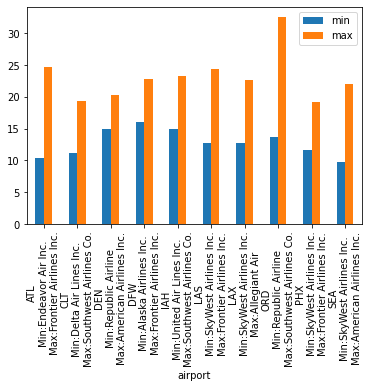

In [25]:

best_worst_carrier_airport_df1 = best_worst_carrier_airport_df[['airport','min','max']]

best_worst_carrier_airport_df.plot(x="airport", y=["min","max"], kind="bar")
plt.xticks(ticks=np.arange(10),labels=best_worst_carrier_airport_df['airport'] + '\nMin:' + best_worst_carrier_airport_df['carrier_name_min']+ '\nMax:' + best_worst_carrier_airport_df['carrier_name_max'])



In [26]:
airline_delay_cause_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71657,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,...,0.0,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
71658,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,...,0.0,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
71659,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,...,0.0,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0
71660,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,...,0.0,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0


In [33]:
airline_delay_correlation_df= airline_delay_cause_df[['airport','month','arr_del15','arr_flights']].groupby(['airport','month']).sum()

airline_delay_correlation_df = airline_delay_correlation_df.reset_index()
airline_delay_correlation_df['arr_del_pct15'] = (airline_delay_correlation_df['arr_del15']/airline_delay_correlation_df['arr_flights'])*100
airline_delay_correlation_df = airline_delay_correlation_df[(airline_delay_correlation_df['arr_flights']> 1000) & (airline_delay_correlation_df['arr_flights'] < 60000)]


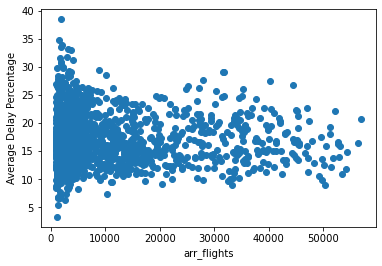

The correlation between both factors is -0.02


In [34]:
plt.scatter(airline_delay_correlation_df['arr_flights'],airline_delay_correlation_df['arr_del_pct15'])
plt.xlabel('arr_flights')
plt.ylabel('Average Delay Percentage')
plt.show()
correlation = st.pearsonr(airline_delay_correlation_df['arr_flights'],airline_delay_correlation_df['arr_del_pct15'])
print(f"The correlation between both factors is {round(correlation[0],2)}")